In [61]:
#Librairies Basiques
import numpy as np
from random import *
import pandas as pd
#Librairies de visualisation
import matplotlib.pyplot as plt
import plotly.express as px

In [62]:
Domaine = {
    'TIC': ['Leadership', 'Infographie', 'DevOps', 'Administrateur reaseua', 'Securité'],
    'Industrie-Manufacturiere': ['Gestionnaire', 'Manutentionnaire', 'Chargeur'],
    'Ingenierie': ['Telecom', 'Mecanique', 'Electronique', 'Robotique', 'Electrique'],
    'Agriculture': ['Cultivateur', 'Transporteur'],
    'Agro-alimentation': ['Biochimiste', 'Nutritionniste'],
    'BTP': ['Maçonnerie', 'Plomberie', 'Carroserie', 'Charpentier', 'Menuisier'],
    'Commerce': ['Grossiste', 'Revender'],
    'Enseignement': ['Formateur', 'Pdagogue', 'Enseignant'],
    'Industrie-Pharmaceutique': ['Pharmacien'],
    'Services-Financiers': ['Comptable', 'Fiscaliste'],
    'Soins et sante': ['Chirurgien', 'Infirmier', 'Aide-soignant', 'Sage-femme'],
    'Justice':['Avocat', 'Hussier', 'Magistrat', 'Procureur']
        }

Id_Work = []
Dataf = []
k = list()
for cle in Domaine.keys():
    k.append(cle)
#print(k)
for i in range(5000):
    Id_Work.append("id"+str(i))
    d = choice(k)
    rating = randint(0,4) + random().__round__(1)
    data = ["id"+str(i), "Auteur"+str(randint(i,5000)),
            d, choice(Domaine[d]), randint(500,1000), rating]
    Dataf.append(data)

#Dataf


In [63]:
df = pd.DataFrame(Dataf,
                  columns=[
                      'Id_Work',
                      'Auteur',
                      'Domaine',
                      'Competence',
                      "Tarif ($)",
                      'Rating'
                  ])

df.head()

,Id_Work,Auteur,Domaine,Competence,Tarif ($),Rating
0,id0,Auteur4596,Agro-alimentation,Biochimiste,971,2.0
1,id1,Auteur150,Commerce,Revender,634,1.7
2,id2,Auteur3682,Industrie-Manufacturiere,Chargeur,844,5.0
3,id3,Auteur3130,Industrie-Pharmaceutique,Pharmacien,696,3.2
4,id4,Auteur2785,Soins et sante,Infirmier,919,2.6


In [64]:
# Les types des données des colonnes
df.dtypes

Id_Work        object
Auteur         object
Domaine        object
Competence     object
Tarif ($)       int64
Rating        float64
dtype: object

count    5000.00000
mean        2.50612
std         1.44301
min         0.00000
25%         1.30000
50%         2.50000
75%         3.80000
max         5.00000
Name: Rating, dtype: float64


<Axes: >

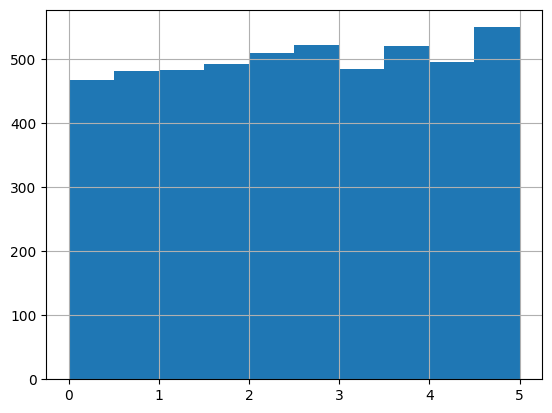

In [65]:
print(df['Rating'].describe())
df['Rating'].hist(bins=10)

In [66]:
pd.cut(df.Rating,bins = [0,1,2,3,4,5]).reset_index().groupby(['Rating']).size()

Rating
(0, 1]    1011
(1, 2]     961
(2, 3]    1032
(3, 4]    1012
(4, 5]     940
dtype: int64

In [67]:
# Renvoyer le produit le plus populaire en fonction de la note
def recommend_most_popular(col,col_value,top_n=5):
    
    return df[df[col]==col_value].sort_values(by="Rating", ascending = False).head(top_n)[["Auteur",col,"Rating"]]

In [68]:
recommend_most_popular(col='Domaine',col_value='TIC')

,Auteur,Domaine,Rating
1973,Auteur2718,TIC,5.0
1152,Auteur3924,TIC,5.0
1145,Auteur2448,TIC,5.0
2778,Auteur3189,TIC,5.0
516,Auteur1739,TIC,5.0


In [69]:
recommend_most_popular(col='Competence',col_value='TIC')

,Auteur,Competence,Rating


# Filtrage basé sur le contenu